One question that arose from group meeting is whether integrating from 0-240 vs 10-240 would be better for the partial cycle yield. In this notebook we explore whether this significantly improves the performance of the model.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.data.make_dataset import make_cat_dict,calc_reactor_metrics
from src.models.constants import Constants
from src.models.util import generate_grid,split,EI,generate_prediction_array,GP_regressor
from src.models.gaussian_process import featurize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
import scipy.stats as ss

In [3]:
plt.style.use('seaborn-talk')
cmap = plt.get_cmap("tab10")

# 1) Assessing performance of each metric

Total data points:  26
Trained Kernel:  2.68**2 * RBF(length_scale=3.39)
Trained Kernel:  2.46**2 * RBF(length_scale=3.81)
Trained Kernel:  2.71**2 * RBF(length_scale=3.52)
Trained Kernel:  2.73**2 * RBF(length_scale=3.36)
Trained Kernel:  2.69**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.3)
Trained Kernel:  2.7**2 * RBF(length_scale=3.31)
Trained Kernel:  2.63**2 * RBF(length_scale=3.31)
Trained Kernel:  2.68**2 * RBF(length_scale=3.33)
Trained Kernel:  2.69**2 * RBF(length_scale=3.32)
Trained Kernel:  2.71**2 * RBF(length_scale=3.33)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.72**2 * RBF(length_scale=3.36)
Trained Kernel:  2.62**2 * RBF(length_scale=3.48)
Trained Kernel:  2.72**2 * RBF(length_scale=3.47)
Trained Kernel:  2.71**2 * RBF(length_scale=3.34)
Trained Kernel:  2.71**2 * RBF(length_scale=3.35)
Trained Kernel:  2.72**2 * RBF(length_scale=3.34)
Trained Kernel:  2.72**2 * RBF(length_scale=3.38)
Trained Kernel:  2.46**2 * RBF(

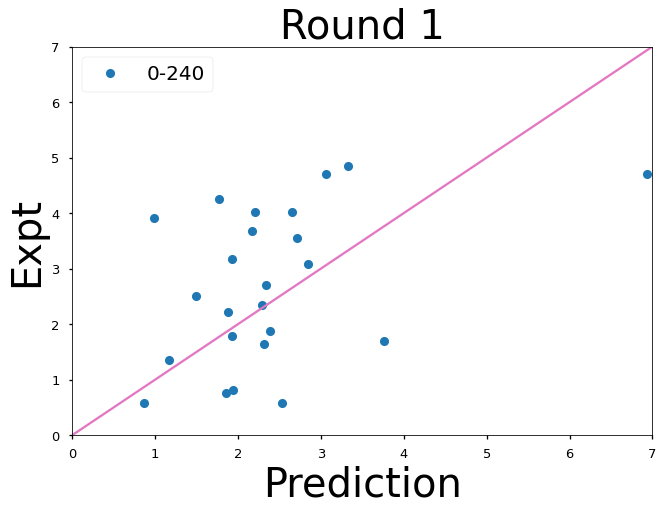

Total data points:  32
Trained Kernel:  2.65**2 * RBF(length_scale=3.61)
Trained Kernel:  2.46**2 * RBF(length_scale=3.52)
Trained Kernel:  2.65**2 * RBF(length_scale=3.37)
Trained Kernel:  2.68**2 * RBF(length_scale=3.31)
Trained Kernel:  2.65**2 * RBF(length_scale=3.27)
Trained Kernel:  2.66**2 * RBF(length_scale=3.27)
Trained Kernel:  2.65**2 * RBF(length_scale=3.28)
Trained Kernel:  2.59**2 * RBF(length_scale=3.24)
Trained Kernel:  2.64**2 * RBF(length_scale=3.29)
Trained Kernel:  2.64**2 * RBF(length_scale=3.27)
Trained Kernel:  2.67**2 * RBF(length_scale=3.3)
Trained Kernel:  2.68**2 * RBF(length_scale=3.31)
Trained Kernel:  2.68**2 * RBF(length_scale=3.31)
Trained Kernel:  2.56**2 * RBF(length_scale=3.63)
Trained Kernel:  2.67**2 * RBF(length_scale=3.31)
Trained Kernel:  2.67**2 * RBF(length_scale=3.3)
Trained Kernel:  2.67**2 * RBF(length_scale=3.32)
Trained Kernel:  2.68**2 * RBF(length_scale=3.3)
Trained Kernel:  2.68**2 * RBF(length_scale=3.32)
Trained Kernel:  2.46**2 * RBF

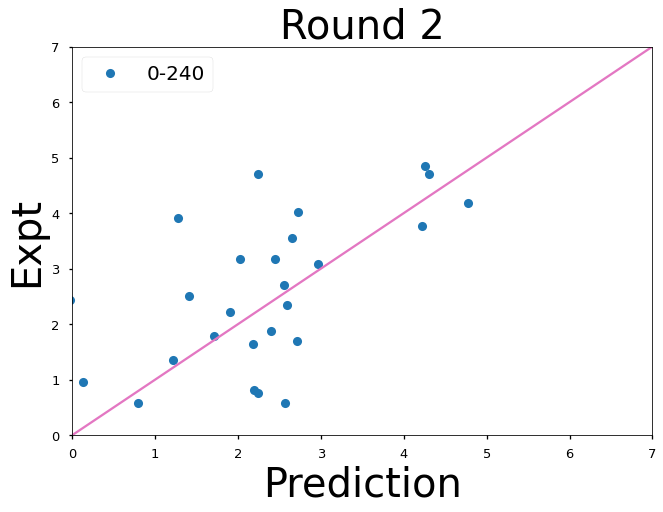

Total data points:  38
Trained Kernel:  2.52**2 * RBF(length_scale=3.62)
Trained Kernel:  2.33**2 * RBF(length_scale=3.55)
Trained Kernel:  2.5**2 * RBF(length_scale=3.39)
Trained Kernel:  2.55**2 * RBF(length_scale=3.39)
Trained Kernel:  2.52**2 * RBF(length_scale=3.35)
Trained Kernel:  2.53**2 * RBF(length_scale=3.36)
Trained Kernel:  2.54**2 * RBF(length_scale=3.37)
Trained Kernel:  2.46**2 * RBF(length_scale=3.33)
Trained Kernel:  2.52**2 * RBF(length_scale=3.37)
Trained Kernel:  2.52**2 * RBF(length_scale=3.36)
Trained Kernel:  2.53**2 * RBF(length_scale=3.36)
Trained Kernel:  2.55**2 * RBF(length_scale=3.39)
Trained Kernel:  2.55**2 * RBF(length_scale=3.39)
Trained Kernel:  2.4**2 * RBF(length_scale=3.57)
Trained Kernel:  2.55**2 * RBF(length_scale=3.4)
Trained Kernel:  2.55**2 * RBF(length_scale=3.38)
Trained Kernel:  2.55**2 * RBF(length_scale=3.4)
Trained Kernel:  2.55**2 * RBF(length_scale=3.38)
Trained Kernel:  2.55**2 * RBF(length_scale=3.4)
Trained Kernel:  2.33**2 * RBF(l

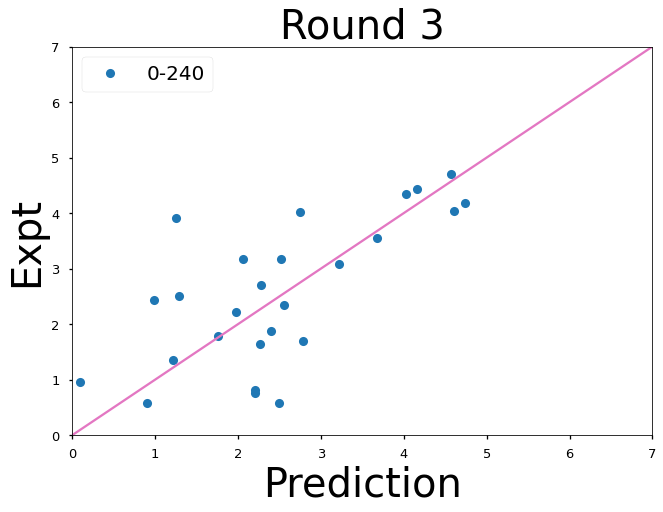

Total data points:  44
Trained Kernel:  2.54**2 * RBF(length_scale=3.29)
Trained Kernel:  2.41**2 * RBF(length_scale=3.25)
Trained Kernel:  2.53**2 * RBF(length_scale=3.17)
Trained Kernel:  2.57**2 * RBF(length_scale=3.17)
Trained Kernel:  2.55**2 * RBF(length_scale=3.14)
Trained Kernel:  2.57**2 * RBF(length_scale=3.17)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.47**2 * RBF(length_scale=3.26)
Trained Kernel:  2.55**2 * RBF(length_scale=3.16)
Trained Kernel:  2.55**2 * RBF(length_scale=3.17)
Trained Kernel:  2.56**2 * RBF(length_scale=3.16)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.46**2 * RBF(length_scale=3.24)
Trained Kernel:  2.58**2 * RBF(length_scale=3.19)
Trained Kernel:  2.57**2 * RBF(length_scale=3.17)
Trained Kernel:  2.58**2 * RBF(length_scale=3.19)
Trained Kernel:  2.57**2 * RBF(length_scale=3.17)
Trained Kernel:  2.58**2 * RBF(length_scale=3.18)
Trained Kernel:  2.4**2 * R

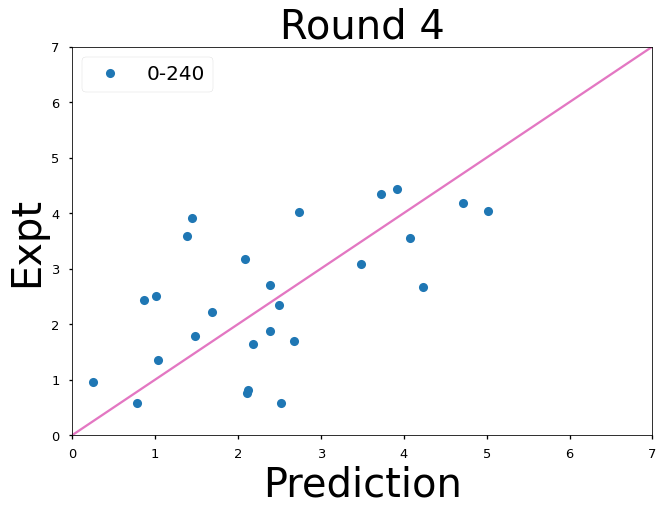

In [4]:
#load in reactor data
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Incl. Rnd 1",3:"Incl. Rnd 2",4:"Incl. Rnd 3"}
label_list = []

for n in range(1,5,1):
    for metric in ["0-240"]:
    #for metric in ["0-240","10-240","0-inf"]:
        fname = f'3-averaged_Round{n}-Standardized.csv'
        f = processed_dir+"/"+fname
        df = pd.read_csv(f,index_col=0)
        df_features,df_targets = featurize(df)
        X = df_features.to_numpy()
        if metric == "0-240":
            Y_pc = -df_targets['Y0']/df_targets['k_d'] * (np.exp(-df_targets['k_d']*240)-np.exp(-df_targets['k_d']*0))
            sqrtY0Y_pc = np.sqrt(df_targets['Y0']*Y_pc).to_numpy()
        elif metric == "10-240":
            Y_pc = -df_targets['Y0']/df_targets['k_d'] * (np.exp(-df_targets['k_d']*240)-np.exp(-df_targets['k_d']*10))
            sqrtY0Y_pc = np.sqrt(df_targets['Y0']*Y_pc).to_numpy()
        elif metric == "0-inf":
            Y_pc = df_targets['Y0']/df_targets['k_d']
            sqrtY0Y_pc = np.sqrt(df_targets['Y0']*Y_pc).to_numpy()            
        y = sqrtY0Y_pc
        y = np.asarray([[i,0] for i in y])
        print("Total data points: ",len(df_features))
        loo = LeaveOneOut().split(X,y=y)
        results = []
        for i, (i_train,i_test) in enumerate(loo):
            mu,sigma = GP_regressor(X[i_train],y[i_train],X[i_test])
            results.append((i_test,y[i_test,0],mu,sigma))

        all_expt = np.asarray([tup[1] for tup in results])
        all_pred = np.asarray([tup[2] for tup in results])

        if n == 1:
            expt=all_expt[:,0]
            pred=all_pred[:,0]
        else:
            expt=all_expt[:-(n-1)*6,0]
            pred=all_pred[:-(n-1)*6,0]
            new_expt=all_expt[-6:] #separate out new points
            new_pred = all_pred[-6:] #separate out new points
        print("Total tested points: ",len(expt))
        mae = np.mean(np.abs(pred-expt))
        slope, intercept, r_value, p_value, std_err = ss.linregress(expt,pred)
        r2 = r_value**2
        rmse = np.sqrt(mean_squared_error(expt,pred))
        mae_norm = np.mean(np.abs(pred-expt)/expt)
        label=f'Round {n} Metric {metric} GP MAE: {mae:.3} RMSE: {rmse:.3} Norm_MAE {mae_norm:.3} R2: {r2:.3}'
        label_list.append(label)
        print(label)
        plt.plot(pred,expt,'o',label=metric)
#         if n != 1:
#             plt.plot(new_pred,new_expt,'o',label=metric)
    parity = [0,7]
    plt.plot(parity,parity,linestyle='-',color=cmap(6))
    plt.ylabel("Expt",fontsize=40)
    plt.xlabel("Prediction",fontsize=40)
    plt.xlim((0,7))
    plt.ylim((0,7))
    plt.legend(fontsize=20)
    plt.title(f'Round {n}',fontsize=40)
    #plt.savefig(f'./figures/GP-LOO-parity-rnd{n}.png',dpi=300,bbox_inches="tight")
    plt.show()   
    

    
# df = pd.read_csv(processed_dir+"/"+fname,index_col=0)
# df.head()

In [28]:
for label in label_list:
    print(label)

Round 1 Metric 0-240 GP MAE: 1.21 RMSE: 1.46 Norm_MAE 0.621 R2: 0.202
Round 1 Metric 10-240 GP MAE: 1.18 RMSE: 1.42 Norm_MAE 0.627 R2: 0.205
Round 1 Metric 0-inf GP MAE: 2.63 RMSE: 3.45 Norm_MAE 0.882 R2: 0.22
Round 2 Metric 0-240 GP MAE: 0.916 RMSE: 1.18 Norm_MAE 0.551 R2: 0.331
Round 2 Metric 10-240 GP MAE: 0.893 RMSE: 1.15 Norm_MAE 0.556 R2: 0.337
Round 2 Metric 0-inf GP MAE: 1.67 RMSE: 2.19 Norm_MAE 0.712 R2: 0.529
Round 3 Metric 0-240 GP MAE: 0.758 RMSE: 0.992 Norm_MAE 0.512 R2: 0.471
Round 3 Metric 10-240 GP MAE: 0.734 RMSE: 0.96 Norm_MAE 0.517 R2: 0.478
Round 3 Metric 0-inf GP MAE: 1.22 RMSE: 1.42 Norm_MAE 0.624 R2: 0.66


## Changing from 0-240 to 10-240 does not improve the normalized MAE. Will keep 0-240 as the metric.

# 2) Assessing other metrics

Now that we have enough data let's take a step back and analyze how various metrics perform.

In [5]:
#load in reactor data
raw_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/raw"
processed_dir = "C:/Users/Hermans_Desktop1/OneDrive - UW-Madison/Documents/Research/2022-P4 (Pt DH ML)/iterative_catalyst_design/data/processed"
n_map = {1:"Base",2:"Incl. Rnd 1",3:"Incl. Rnd 2",4:"Incl. Rnd 3"}
label_list = []
res_list = []

for n in range(1,5,1):
    for metric in ["sqrtY0Ypc_0-240","sqrtY0Ypc_10-240","Ypc_0-240","Ypc_10-240"]:
        fname = f'3-averaged_Round{n}-Standardized.csv'
        f = processed_dir+"/"+fname
        df = pd.read_csv(f,index_col=0)
        df_features,df_targets = featurize(df)
        X = df_features.to_numpy()
        if metric == "sqrtY0Ypc_0-240":
            Y_pc = -df_targets['Y0']/df_targets['k_d'] * (np.exp(-df_targets['k_d']*240)-np.exp(-df_targets['k_d']*0))
            chosen_metric = np.sqrt(df_targets['Y0']*Y_pc).to_numpy()
        elif metric == "sqrtY0Ypc_10-240":
            Y_pc = -df_targets['Y0']/df_targets['k_d'] * (np.exp(-df_targets['k_d']*240)-np.exp(-df_targets['k_d']*10))
            chosen_metric = np.sqrt(df_targets['Y0']*Y_pc).to_numpy()
        elif metric == "0-inf":
            Y_pc = df_targets['Y0']/df_targets['k_d']
            chosen_metric = np.sqrt(df_targets['Y0']*Y_pc).to_numpy()  
        elif metric == "Ypc_0-240":
            chosen_metric = -df_targets['Y0']/df_targets['k_d'] * (np.exp(-df_targets['k_d']*240)-np.exp(-df_targets['k_d']*0))
        elif metric == "Ypc_10-240":
            chosen_metric = -df_targets['Y0']/df_targets['k_d'] * (np.exp(-df_targets['k_d']*240)-np.exp(-df_targets['k_d']*10))
        y = chosen_metric
        y = np.asarray([[i,0] for i in y])
        print(f'Round {n} Total data points: {len(df_features)}')
        loo = LeaveOneOut().split(X,y=y)
        results = []
        for i, (i_train,i_test) in enumerate(loo):
            mu,sigma = GP_regressor(X[i_train],y[i_train],X[i_test],verbose=False)
            results.append((i_test,y[i_test,0],mu,sigma))

        all_expt = np.asarray([tup[1] for tup in results])
        all_pred = np.asarray([tup[2] for tup in results])

        if n == 1:
            expt=all_expt[:,0]
            pred=all_pred[:,0]
        else:
            expt=all_expt[:-(n-1)*6,0]
            pred=all_pred[:-(n-1)*6,0]
            new_expt=all_expt[-6:] #separate out new points
            new_pred = all_pred[-6:] #separate out new points
        print(f'Round {n} Total tested points: {len(expt)}')
        mae = np.mean(np.abs(pred-expt))
        slope, intercept, r_value, p_value, std_err = ss.linregress(expt,pred)
        r2 = r_value**2
        rmse = np.sqrt(mean_squared_error(expt,pred))
        mae_norm = np.mean(np.abs(pred-expt)/expt)
        rmse_norm = rmse / np.mean(expt)
        label=f'Round {n} Metric {metric} GP Norm_MAE {mae_norm:.3} Norm_RMSE {rmse_norm:.3} R2: {r2:.3}'
        res = {'n':n,'metric':metric,'mae_norm':mae_norm,'rmse_norm':rmse_norm,'r2':r2}
        res_list.append(res)
        label_list.append(label)
print('\n-------------------------------------------------------------------------\n')
for label in label_list:
    print(label)

Round 1 Total data points: 26
Round 1 Total tested points: 26
Round 1 Total data points: 26
Round 1 Total tested points: 26
Round 1 Total data points: 26
Round 1 Total tested points: 26
Round 1 Total data points: 26
Round 1 Total tested points: 26
Round 2 Total data points: 32
Round 2 Total tested points: 26
Round 2 Total data points: 32
Round 2 Total tested points: 26
Round 2 Total data points: 32
Round 2 Total tested points: 26
Round 2 Total data points: 32
Round 2 Total tested points: 26
Round 3 Total data points: 38
Round 3 Total tested points: 26
Round 3 Total data points: 38
Round 3 Total tested points: 26
Round 3 Total data points: 38
Round 3 Total tested points: 26
Round 3 Total data points: 38
Round 3 Total tested points: 26
Round 4 Total data points: 44
Round 4 Total tested points: 26
Round 4 Total data points: 44
Round 4 Total tested points: 26
Round 4 Total data points: 44
Round 4 Total tested points: 26
Round 4 Total data points: 44
Round 4 Total tested points: 26

-------

In [21]:
list(metrics.values())

[0, 1, 2, 3]

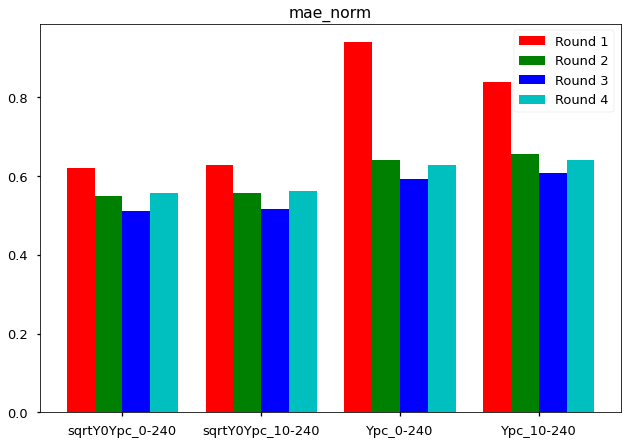

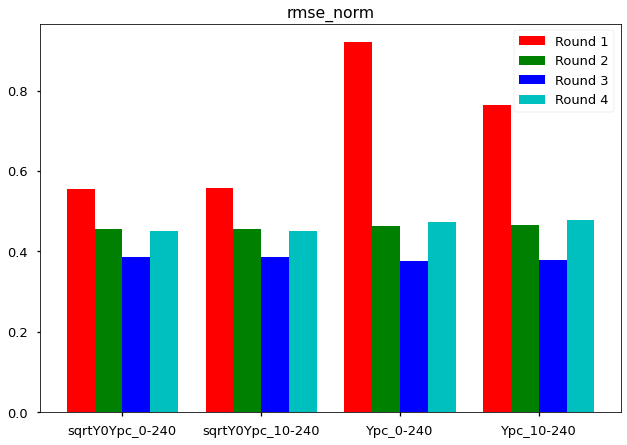

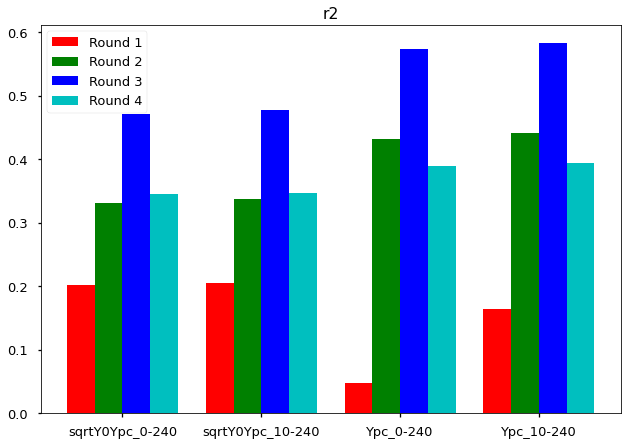

In [9]:
width = .2
metrics = {"sqrtY0Ypc_0-240":0,"sqrtY0Ypc_10-240":1,"Ypc_0-240":2,"Ypc_10-240":3}

color_list = ['r','g','b','c']
#https://matplotlib.org/stable/gallery/color/named_colors.html

for i,val in enumerate(['mae_norm','rmse_norm','r2']):
    fig, ax = plt.subplots()
    for res in res_list:
        if res["metric"] == "sqrtY0Ypc_0-240":
            ax.bar(metrics[res["metric"]]+width*res["n"],res[val],width=width,color=color_list[res["n"]-1],label=f'Round {res["n"]}')
        else:
            ax.bar(metrics[res["metric"]]+width*res["n"],res[val],width=width,color=color_list[res["n"]-1])
            

    plt.xticks(np.asarray(list(metrics.values()))+.5,list(metrics.keys()))
    plt.title(val)
    plt.legend()
    plt.show()



MAE is more resistant to outliers influencing the score. MAE is lower for the sqrt metrics.
RMSE shows slightly higher score for sqrt values.
r2 is higher for non-sqrt values. On the whole there is no significant difference.